# Étude de l'erreur due à la diffusion et à la convection dans le cas du SWARM

In [1]:
import sys

sys.path = ['/home/as259691/PycharmProjects/FluidDyn1D'] + sys.path

In [2]:
from src.main import *
from src.plot_fields import *

%matplotlib widget

## Paramètres de la simulation

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [3]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., 
                              alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno', time_scheme='rk4')
markers = None
Formulation = [Problem, ProblemConserv2]

n = 10000
t_fin = 0.01

## Étude selon la formulation de l'équation

En fait s'il n'y a pas de convection il n'y a pas de différence entre les différentes formes, à l'exception de la moyenne utilisée pour $\frac{1}{\rho C_p}$

### RK4

In [4]:
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
fig2, ax2 = plt.subplots(1)
ax2.set_title('Énergie adimensionnée en fonction du temps adim')
for form in Formulation:
    prob = form(markers, get_T_creneau, phy_prop=phy_prop, num_prop=num_prop)
    E0 = prob.energy
    t, e = prob.timestep(t_fin=t_fin, number_of_plots=5, debug=False, plotter=Plotter('decale'))
    l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
    ax1.legend()
    n = len(e)
    i0 = int(n/5)
    ax2.plot(t/prob.dt, e / E0, label=prob.name)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
    # par Dt / rho_cp_l T_l V
    print(prob.name, 'dE*/dt* = %f' % dedt_adim)
le = fig2.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

dt fourier
6.896325922215141e-06


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Cas : mixte, rk4, weno, dx = 3.9e-05, dt = 6.89633e-06, cfl = 0.0353657 dE*/dt* = -0.000000
dt fourier
6.896325922215141e-06


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Forme conservative boniou, Cas : mixte, rk4, weno, dx = 3.9e-05, dt = 6.89633e-06, cfl = 0.0353657 dE*/dt* = -0.000000


### Euler

In [ ]:
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno', time_scheme='euler')

In [5]:
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
fig2, ax2 = plt.subplots(1)
ax2.set_title('Énergie adimensionnée en fonction du temps adim')
for form in Formulation:
    prob = form(markers, get_T_creneau, phy_prop=phy_prop)
    E0 = prob.energy
    t, e = prob.timestep(t_fin=t_fin, number_of_plots=5, debug=False, plotter=Plotter('decale'))
    l = ax1.plot(t, e/0.02, label=prob.name)
    ax1.legend()
    n = len(e)
    i0 = int(n/5)
    ax2.plot(t/prob.dt, e / E0, label=prob.name)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
    # par Dt / rho_cp_l T_l V
    print(prob.name, 'dE*/dt* = %f' % dedt_adim)
le = fig2.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

6.918476729633315e-06


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Cas : mixte, euler, weno, dx = 3.90626e-05, dt = 6.91848e-06, cfl = 0.0354225 dE*/dt* = -0.000001
6.918476729633315e-06


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Forme conservative boniou, Cas : mixte, euler, weno, dx = 3.90626e-05, dt = 6.91848e-06, cfl = 0.0354225 dE*/dt* = 0.000012


## Cas boniou, euler avec weno et upwind quand le stencil traverse l'interface

In [ ]:
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno upwind', time_scheme='euler')

In [6]:
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')
fig2, ax2 = plt.subplots(1)
ax2.set_title('Énergie adimensionnée en fonction du temps adim')
for form in Formulation:
    prob = form(markers, get_T_creneau, phy_prop=phy_prop, num_prop=num_prop)
    E0 = prob.compute_energy()
    t, e = prob.timestep(t_fin=t_fin, number_of_plots=5, debug=False, plotter=Plotter('decale'))
    l = ax1.plot(t, e/0.02, label=prob.name)
    ax1.legend()
    n = len(e)
    i0 = int(n/5)
    ax2.plot(t/prob.dt, e / E0, label=prob.name)
    dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
    # par Dt / rho_cp_l T_l V
    print(prob.name, 'dE*/dt* = %f' % dedt_adim)
le = fig2.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

6.918476729633315e-06


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Cas : mixte, euler, weno upwind, dx = 3.90626e-05, dt = 6.91848e-06, cfl = 0.0354225 dE*/dt* = -0.000002
6.918476729633315e-06


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Forme conservative boniou, Cas : mixte, euler, weno upwind, dx = 3.90626e-05, dt = 6.91848e-06, cfl = 0.0354225 dE*/dt* = 0.000003


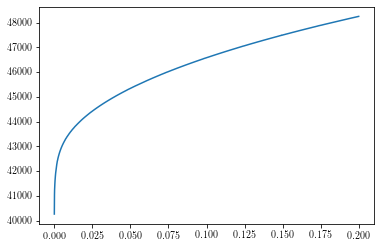

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(1)
l = ax1.plot(t, e/0.02, label=prob.name)